<a href="https://colab.research.google.com/github/yaseminates/quantum-learning-ensemble-iyq2025/blob/main/Quantum_Learning_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantum Learning Ensemble

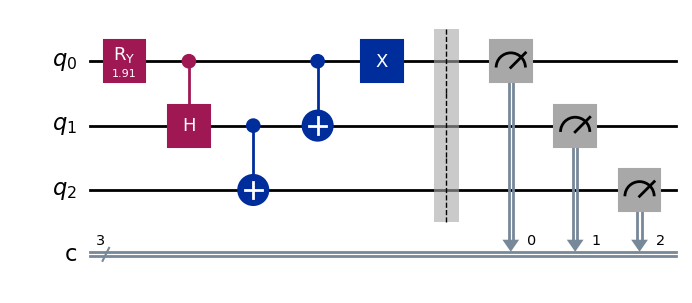

In [ ]:
from qiskit import QuantumCircuit
import numpy as np

#4-qubit circuit
#qc = QuantumCircuit(4, 4)
qc = QuantumCircuit(3, 3)


#Ry gate on q0: P(|1⟩) = 2/3
theta = 2 * np.arcsin(np.sqrt(2/3))
qc.ry(theta, 0)

#CH from q0 to q1
qc.ch(0, 1)

#CNOT from q1 to q2
qc.cx(1, 2)

#CNOT from q0 to q1
qc.cx(0, 1)

#X (NOT) gate on q0
qc.x(0)

"""
qc.barrier()  # -------- divider

#CNOT from q0 to q3
qc.cx(0, 3)

#CH from q2 to q3
qc.ch(2, 3)
"""

qc.barrier()

#Measure all qubits
qc.measure(0, 0)
qc.measure(1, 1)
qc.measure(2, 2)
#qc.measure(3, 3)

qc.draw(output='mpl')


In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import numpy as np

def quantum_monty_hall_game():
    print("Welcome to the Quantum Monty Hall Game.")
    print("Three doors: one diamond, two goats.")
    player_choice = input("Pick your door (0, 1, or 2): ")
    while player_choice not in ['0','1','2']:
        player_choice = input("Please choose 0, 1, or 2: ")
    player_choice = int(player_choice)

    max_attempts = 20
    simulator = AerSimulator()

    for attempt in range(max_attempts):
        qc = QuantumCircuit(5, 5)

        theta = 2 * np.arcsin(np.sqrt(2/3))
        qc.ry(theta, 0)
        qc.ch(0, 1)
        qc.cx(1, 2)
        qc.cx(0, 1)
        qc.x(0)
        qc.barrier()

        if player_choice == 1:
            qc.x(3)
        elif player_choice == 2:
            qc.x(3)
            qc.z(3)
        qc.barrier()

        qc.cx(0, 4)
        qc.ch(2, 4)
        qc.barrier()

        qc.measure([0,1,2,3,4], [0,1,2,3,4])

        try:
            compiled_circ = transpile(qc, simulator)
            job = simulator.run(compiled_circ, shots=1)
            result = job.result()
            counts = result.get_counts()

            if not counts:
                print(f"Attempt {attempt+1}: No counts, retrying...")
                continue

            result_str = list(counts.keys())[0]
            q4, q3, q2, q1, q0 = [int(bit) for bit in result_str[::-1]]
            prize_bits = [q0, q1, q2]

            if sum(prize_bits) != 1:
                continue

            prize_door = prize_bits.index(1)
            monty_shows = q4

            if monty_shows != prize_door and monty_shows != player_choice:

                #print(f"Quantum result: {result_str}")
                #print(f"Prize behind door {prize_door}")
                print(f"You picked door {player_choice}")
                print(f"Monty opens door {monty_shows}")
                break

        except Exception as e:
            print(f"Attempt {attempt+1}: Error {e}, retrying...")
            continue
    else:
        print("Using classical fallback.")
        prize_door = np.random.choice([0,1,2])
        monty_options = [d for d in range(3) if d != player_choice and
                         d != prize_door]
        monty_shows = monty_options[0]
        print(f"Prize behind door {prize_door}")
        print(f"You picked door {player_choice}")
        print(f"Monty opens door {monty_shows}. Goat!")

    switch = input("Switch? (y/n): ").lower().startswith('y')
    final_choice = player_choice
    if switch:
        remaining = {0,1,2} - {player_choice, monty_shows}
        final_choice = remaining.pop()

    print(f"Final choice: door {final_choice}")
    if final_choice == prize_door:
        print("You win the diamond!")
    else:
        print("You got a goat. Try switching next time.")

quantum_monty_hall_game()

Welcome to the Quantum Monty Hall Game.
Three doors: one diamond, two goats.
Pick your door (0, 1, or 2): 1
You picked door 1
Monty opens door 0
Switch? (y/n): n
Final choice: door 1
You win the diamond!
